##### Bastien AVRILLON et Guillaume GIESSNER (Groupe n°4)

# <center>Mini-projet 4 d'Optimisation - RESTAURATION D'IMAGES</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import math
from scipy.ndimage import gaussian_filter

## 1 - Étude du problème d'optimisation

#### Question 1 -

Les variables de décisions sont les $N = n \times m$ pixel de l'images qui forment donc un vecteur $z \in \mathbb{R}^{n \times m}$. Par commodité, on indice ces variables par leur position dans l'image, en voyant $z$ comme une matrice de $\mathcal{M}_{n \times m}(\mathbb{R})$.

Le problème de restauration d’image consiste à minimiser la fonction coût suivante :

$\begin{aligned}
f \colon \mathbb{R}^{n \times m} \to \mathbb{R} \\
z \mapsto f(z) & = \dfrac{1}{2} \| z - u_b \|_2^2 + \sum_{i,j} \| \nabla z(i,j) \|_2^2 \\
                &= \sum_{1 \leq i \leq n \; , \; 1 \leq j \leq m} \dfrac{1}{2} (z(i,j) - u_b(i,j))^2 \\
                &+ \sum_{1 \leq j < m} \left( z(n, j+1) - z(n, j) \right)^2 \\ 
                &+ \sum_{1 \leq i < n} \left( z(i+1, m) - z(i, m) \right)^2 \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \left( z(i+1, j) - z(i, j) \right)^2 + \left( z(i, j+1) - z(i, j) \right)^2
\end{aligned}$

On a effectivement  $\|\nabla u(i,j)\|_2^2 = \nabla_x u(i,j)^2 + \nabla_y u(i,j)^2 $, donc :

$ \begin{aligned}
\sum_{i,j} \| \nabla u(i,j) \|_2^2 &= \sum_{1 \leq i \leq n \; , \; 1 \leq j \leq m} \nabla_x u(i,j)^2 + \nabla_y u(i,j)^2 \\
&= \sum_{1 \leq j < n} \left( u(n, j+1) - u(n, j) \right)^2 + 
    \sum_{1 \leq i < n} \left( u(i+1, n) - u(i, n) \right)^2
    \sum_{1 \leq i < n \; , \; 1 \leq j < m} \left( u(i+1, j) - u(i, j) \right)^2 + \left( u(i, j+1) - u(i, j) \right)^2 \end{aligned}$

La contrainte imposée dans la minimisation est définie par :

$\begin{aligned}
c \colon \mathbb{R}^{2n \times m} &\to \mathbb{R}^{2n \times m}  \\
z &\mapsto c(z) = \begin{cases} 
-z(i,j) & \text{si } 1 \leq i \leq n, \\ 
z(i,j) - 1 & \text{si } n + 1 \leq i \leq 2n. 
\end{cases} 
\end{aligned}$


De cette manière, le problème de minimisation devient : $\min\limits_{z \in \mathbb{R}^{n \times m},\ c(z) \leq 0} f(z)$


#### Question 2 -

$ u \mapsto \frac{1}{2} \| u - u_b \|_2^2 $ est une fonction quadratique de matrice héssienne $I_{nm}$ (qui est symétrique positive) donc convexe, 

$ u \mapsto \sum_{i,j} \| \nabla u(i,j) \|_2^2 $ est également convexe, car comme détaillé par le calcul à la question précédente, elle s'écrit comme 3 sommes de termes de la forme $ u \mapsto (u(k,l) - u(p,q))^2 $, qui sont eux-même convexe par composition préservant la convexité de l'application linéaire $ u \mapsto u(k,l) - u(p,q) $ avec la fonction carré qui est convexe sur $\mathbb{R}$.

Ainsi, $f$ est convexe, comme somme de ceux fonctions convexes.

La différentiabilité de cette fonction $f$ provient du fait qu'elle est une fonction polynomiale (en les coordonnées de la base canonique de $\mathbb{R}^{n \times m}$),comme détaillé par le calcul à la question précédente.

#### Question 3 -

Montrons que le gradient de la fonction $ f $ est donné par $\nabla f(u) = u - u_b - 2 \text{div}(\nabla u) = u - u_b - 2 \Delta u$

La fonction $ f $ est définie par $f(u) = \frac{1}{2} \|u - u_b\|^2 + \sum_{(i,j)} \|\nabla u(i, j)\|^2$

On a pour le premier terme $\nabla \left( \frac{1}{2} \|u - u_b\|^2 \right) = \nabla \left( \frac{1}{2} \sum_{(i,j)} (u(i,j) - u_b(i,j))^2 \right) = u - u_b$

Pour le second, il s'agit donc de montrer que $\nabla \left( \sum_{(i,j)} \|\nabla u_{(i,j)}\|^2 \right) = -2 \, \mathrm{div}(\nabla u)$

Posons $ \beta_2(u) = \sum_{(i,j)} \|\nabla u_{(i,j)}\|^2$, et cherchons le gradient de cette fonction $\nabla \beta_2$ :

$$\begin{aligned}
\beta_2(u) &= \sum_{1 \leq j < m} \left( u(n, j+1) - u(n, j) \right)^2 \\ 
                &+ \sum_{1 \leq i < n} \left( u(i+1, m) - u(i, m) \right)^2 \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \left( u(i+1, j) - u(i, j) \right)^2 + \left( u(i, j+1) - u(i, j) \right)^2
\end{aligned}$$

Donc, en prenant le gradient :


$$\begin{aligned}
\nabla \beta_2(u) &= \sum_{1 \leq j < m} 2\left( u(n, j+1) - u(n, j) \right) \nabla \left( u(n, j+1) - u(n, j) \right) \\ 
                &+ \sum_{1 \leq i < n} 2\left( u(i+1, m) - u(i, m) \right) \nabla \left( u(i+1, m) - u(i, m) \right) \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( u(i+1, j) - u(i, j) \right) \nabla \left( u(i+1, j) - u(i, j) \right) + 2\left( u(i, j+1) - u(i, j) \right) \nabla \left( u(i, j+1) - u(i, j) \right)
\end{aligned}$$

On calcule les gradient des fonctions intervenant dans les sommes précédentes. On a noté $E_{ij}$ les matrices de la base canonique de $\mathcal{M}_{n \times m}(\mathbb{R})$ :

$$\begin{aligned}
\nabla \beta_2(u) &= \sum_{1 \leq j < m} 2\left( u(n, j+1) - u(n, j) \right) \left( E_{n, j+1} - E_{n, j} \right) \\ 
                &+ \sum_{1 \leq i < n} 2\left( u(i+1, m) - u(i, m) \right) \left( E_{i+1, m} - E_{i, m} \right) \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( u(i+1, j) - u(i, j) \right) \left( E_{i+1, j} - E_{i, j} \right) + 2\left( u(i, j+1) - u(i, j) \right) \left( E_{i, j+1} - E_{i, j} \right) \\
\end{aligned}$$

On découpe ensuite les sommes et on les ré-indexe pour une meilleure lisibilité :

$$\begin{aligned}
\nabla \beta_2(u) &= \sum_{1 \leq j < m} 2\left( u(n, j+1) - u(n, j) \right) E_{n, j+1} \\ 
                &- \sum_{1 \leq j < m} 2\left( u(n, j+1) - u(n, j) \right) E_{n, j}  \\ 
                &+ \sum_{1 \leq i < n} 2\left( u(i+1, m) - u(i, m) \right) E_{i+1, m} \\
                &- \sum_{1 \leq i < n} 2\left( u(i+1, m) - u(i, m) \right) E_{i, m} \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( u(i+1, j) - u(i, j) \right) E_{i+1, j}\\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( u(i+1, j) - u(i, j) \right) E_{i, j}  \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( u(i, j+1) - u(i, j) \right) E_{i, j+1} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( u(i, j+1) - u(i, j) \right) E_{i, j} \\
\nabla \beta_2(u) &= \sum_{2 \leq j \leq m} 2\left( u(n, j) - u(n, j-1) \right) E_{n, j} \\ 
                &- \sum_{1 \leq j < m} 2\left( u(n, j+1) - u(n, j) \right) E_{n, j}  \\ 
                &+ \sum_{2 \leq i \leq n} 2\left( u(i, m) - u(i-1, m) \right) E_{i, m} \\
                &- \sum_{1 \leq i < n} 2\left( u(i+1, m) - u(i, m) \right) E_{i, m} \\
                &+ \sum_{\substack{2 \leq i \leq n \\ 1 \leq j < m}} 2\left( u(i, j) - u(i-1, j) \right) E_{i, j}\\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( u(i+1, j) - u(i, j) \right) E_{i, j}  \\
                &+ \sum_{\substack{1 \leq i < n \\ 2 \leq j \leq m}} 2\left( u(i, j-1) - u(i, j-1) \right) E_{i, j} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( u(i, j+1) - u(i, j) \right) E_{i, j}

\end{aligned}$$

On peut alors faire apparaître le gradient discret dans l'expression précédente :

$$\begin{aligned}
\nabla \beta_2(u) &= \sum_{2 \leq j \leq m} 2\left( \nabla_y u(n,j-1) \right) E_{n, j} \\ 
                &- \sum_{1 \leq j < m} 2\left( \nabla_y u(n,j) \right) E_{n, j}  \\ 
                &+ \sum_{2 \leq i \leq n} 2\left( \nabla_x u(i-1,m) \right) E_{i, m} \\
                &- \sum_{1 \leq i < n} 2\left( \nabla_x u(i,m) \right) E_{i, m} \\
                &+ \sum_{\substack{2 \leq i \leq n \\ 1 \leq j < m}} 2\left( \nabla_x u(i-1,j) \right) E_{i, j}\\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( \nabla_x u(i,j) \right) E_{i, j}  \\
                &+ \sum_{\substack{1 \leq i < n \\ 2 \leq j \leq m}} 2\left( \nabla_y u(i,j-1) \right) E_{i, j} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} 2\left( \nabla_y u(i,j) \right) E_{i, j} \\
\end{aligned}$$

On rentre les 4 premières sommes dans les 4 secondes :

$$\begin{aligned}
\nabla \beta_2(u) &= \sum_{\substack{2 \leq i \leq n \\ 1 \leq j \leq m}} 2\left( \nabla_x u(i-1,j) \right) E_{i, j}\\
                &- \sum_{\substack{1 \leq i \leq n \\ 1 \leq j < m}} 2\left( \nabla_x u(i,j) \right) E_{i, j}  \\
                &+ \sum_{\substack{1 \leq i \leq n \\ 2 \leq j \leq m}} 2\left( \nabla_y u(i,j-1) \right) E_{i, j} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j \leq m}} 2\left( \nabla_y u(i,j) \right) E_{i, j} \\
                
                &= \sum_{\substack{1 < i < n \\ 1 \leq j \leq m}} 2\left( \nabla_x u(i-1,j) \right) E_{i, j} + \sum_{\substack{1 \leq j \leq m}} 2\left( \nabla_x u(n-1,j) \right) E_{n, j}\\
                &- \sum_{\substack{1 < i < n \\ 1 \leq j < m}} 2\left( \nabla_x u(i,j) \right) E_{i, j} - \sum_{\substack{1 \leq j < m}} 2\left( \nabla_x u(1,j) \right) E_{1, j} - [\sum_{\substack{1 \leq j < m}} 2\left( \nabla_x u(n,j) \right) E_{n, j} ]  \\
                &+ \sum_{\substack{1 \leq i \leq n \\ 1 < j < m}} 2\left( \nabla_y u(i,j-1) \right) E_{i, j} + \sum_{\substack{1 \leq i \leq n}} 2\left( \nabla_y u(i,m-1) \right) E_{i, m} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 < j < m}} 2\left( \nabla_y u(i,j) \right) E_{i, j} - \sum_{\substack{1 \leq i < n}} 2\left( \nabla_y u(i,1) \right) E_{i, 1} - [\sum_{\substack{1 \leq i < n}} 2\left( \nabla_y u(i,m) \right) E_{i, m} ]\\
\end{aligned}$$

Les termes encadrés sont nuls, par définition du gradient discret. Finalement, l'expression suivante permet bien de retrouver celle de $-2 \mathrm{div}(\nabla u)$ : 

$$\begin{aligned}
\nabla \beta_2(u) &= \sum_{\substack{1 < i < n \\ 1 \leq j \leq m}} 2\left( \nabla_x u(i-1,j) \right) E_{i, j} + \sum_{\substack{1 \leq j \leq m}} 2\left( \nabla_x u(n-1,j) \right) E_{n, j}\\
                &- \sum_{\substack{1 < i < n \\ 1 \leq j < m}} 2\left( \nabla_x u(i,j) \right) E_{i, j} - \sum_{\substack{1 \leq j < m}} 2\left( \nabla_x u(1,j) \right) E_{1, j}  \\
                &+ \sum_{\substack{1 \leq i \leq n \\ 1 < j < m}} 2\left( \nabla_y u(i,j-1) \right) E_{i, j} + \sum_{\substack{1 \leq i \leq n}} 2\left( \nabla_y u(i,m-1) \right) E_{i, m} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 < j < m}} 2\left( \nabla_y u(i,j) \right) E_{i, j} - \sum_{\substack{1 \leq i < n}} 2\left( \nabla_y u(i,1) \right) E_{i, 1} \\
\end{aligned}$$

D'où, pour ce second terme, $\nabla \left( \sum_{(i,j)} \|\nabla u_{(i,j)}\|^2 \right) = \nabla \beta_2(u) = -2 \, \mathrm{div}(\nabla u)$. Ce qui conclut la démonstration.

## 2 - Résolution numérique

#### Question 4 -

In [2]:
def matrice_to_image(mat):
    mat_prime = mat[:,:,np.newaxis]
    return np.stack([mat]*3, axis=-1)

In [3]:
def matrice_to_vecteur(mat):
    return np.ravel(mat)

def vecteur_to_matrice(vect):
    return(vect.reshape(n,m))

In [4]:
#L'image d'origine est en RGB, on l'importe en noir et blanc avec 1 canal :
img_noise = plt.imread('robot_noise.jpg')[...,0]          
img_no_noise = plt.imread('robot_no_noise.jpg')[...,0]

#L'importation code les pixels sur des entiers de 8bits, on veut des flotants de 32bits :
img_noise = img_noise.astype(np.float32) / 255.0
img_no_noise = img_no_noise.astype(np.float32) / 255.0

In [5]:
n,m = img_noise.shape #Dimension des images

In [6]:
def f(u):
    difference =  u -img_noise
    terme_1 = 0.5*np.linalg.norm(difference.reshape(-1),2)**2
    terme_2 = np.linalg.norm(grad_img(u).ravel(),2)**2
    res = terme_1 + terme_2
    return res

In [7]:
def grad_img(u):                                    #Gradient d'une image
    grad_x = np.zeros_like(u)
    grad_y = np.zeros_like(u)
    grad_x[:-1, :] = u[1:, :] - u[:-1, :]
    grad_y[:, :-1] = u[:, 1:] - u[:, :-1]
    grad_im = np.stack((grad_x, grad_y), axis=-1)
    return grad_im

def divergence(v):                              #Divergence d'une fonction
    div = np.zeros_like(v)[:,:,0]
    div[1:-1,:] += v[1:-1,:,0] - v[:-2, :,0]
    div[:, 1:-1] += v[:,1:-1,1] - v[:,:-2,1]
    div[0,:] += v[0,:,0]
    div[:,0] += v[:,0,1]
    div[-1,:] -= v[-2,:,0]
    div[:,-1] -= v[:,-2,1]
    return div

def laplacien(u):                               #Laplacien d'une image
    grad_im = grad_img(u)
    return divergence(grad_im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8431373..2.4431374].


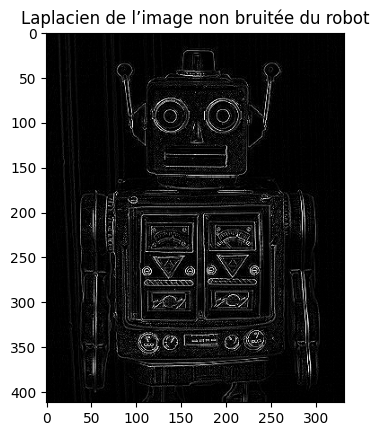

In [8]:
plt.imshow(matrice_to_image(laplacien(img_no_noise)),cmap='gray')
plt.title("Laplacien de l’image non bruitée du robot")
plt.show()

#### Question 5 -

In [9]:
def grad_f(u):
    res = u -img_noise -2*laplacien(u) 
    return res

In [10]:
#Vérification de l'implémentation du gradient de f

def approximation_grad_f(u,h,epsilon):
    return (f(u+epsilon*h)-f(u-epsilon*h))/(2*epsilon)

u1 = img_no_noise
epsilon = 0.00001
h = np.random.rand(n,m)

print(approximation_grad_f(u1,h,epsilon),np.trace(np.dot(np.transpose(grad_f(u1)),h)))

-769.816257070488 -769.8162893326946


In [11]:
#30s d'exécution

def optim_gradient_fixed_step(grad_fun, x0, l, max_iter = 10000, epsilon_grad_fun = 0.005):
    k = 0
    xk = x0
    grad_f_xk = grad_fun(xk)
    nb_iterations = 0
    while ((k<max_iter) and (np.linalg.norm(grad_f_xk.reshape(-1),1)>epsilon_grad_fun)):
        pk = -grad_f_xk
        xk = xk + l*pk
        grad_f_xk = grad_fun(xk)
        k = k + 1
        nb_iterations += 1
    return xk,nb_iterations

u_optim_fixed_step,nb_iterations = optim_gradient_fixed_step(grad_f, img_noise, 0.05)

print("Nombre d'itérations de l'algorithme : ",nb_iterations)
norme = np.linalg.norm(grad_f(u_optim_fixed_step).reshape(-1),1)
print("Norme du gradient à l'optimal : ",norme)

Nombre d'itérations de l'algorithme :  10000
Norme du gradient à l'optimal :  0.028647592


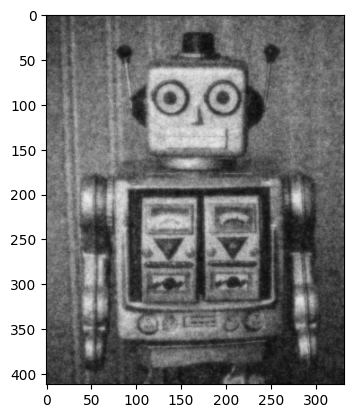

In [12]:
plt.imshow(matrice_to_image(u_optim_fixed_step), cmap='gray')

On obtient distinctement l'image ( norme environ à 0,03), bien qu'elle semble peut-être légèrement plus pixcélisé que l'originale. Les détails sont en effet moins dessinés sur la copie. On en conclus que ce système de transport ne semble pas optimal pour récupérer au maximum l'information de l'image.

In [13]:
# Analyse des résultats :

norme_grad_ini = np.linalg.norm((img_noise).reshape(-1),1)
cout_ini = f(img_noise)

norme_grad_fin = np.linalg.norm(grad_f(u_optim_fixed_step).reshape(-1),1)
cout_fin = f(u_optim_fixed_step)

print("Initialement (norme du gradient,cout) : ", norme_grad_ini,cout_ini)
print("Finalement (norme du gradient,cout) : ", norme_grad_fin,cout_fin)

Initialement (norme du gradient,cout) :  55117.09 20810.404
Finalement (norme du gradient,cout) :  0.028647592 2535.7827


#### Question 6 -

In [14]:
def RMSE(u):
    difference =  img_no_noise - u 
    numerateur = np.linalg.norm(difference.reshape(-1),2)**2
    denominateur = math.prod(u.shape)
    res = (numerateur/denominateur)**0.5
    return res

print(f"RMSE finale pour l’image trouvée par la minimisation via une méthode de descente de gradient à pas fixe : {RMSE(u_optim_fixed_step)}")
print(f"RMSE pour l'image bruitée d'origine : {RMSE(img_noise)}")

RMSE finale pour l’image trouvée par la minimisation via une méthode de descente de gradient à pas fixe : 0.09647674113512039
RMSE pour l'image bruitée d'origine : 0.18528446555137634


#### Question 7 -

In [15]:
u0 = matrice_to_vecteur(img_noise)

def f_scipy(u):
    return f(vecteur_to_matrice(u))

def grad_f_scipy(u):
    return matrice_to_vecteur(grad_f(vecteur_to_matrice(u)))

In [16]:
#Méthode L-BFGS-B (Quasi-Newton avec une projection permettant de rester dans les bornes fixées):

resultat = optimize.minimize(f_scipy,u0,method='L-BFGS-B',jac=grad_f_scipy)
u_vect_minimisation_scipy = resultat.x
u_minimisation_scipy_BFGS = vecteur_to_matrice(u_vect_minimisation_scipy)
print(resultat)

norme_grad_fin_BFGS = np.linalg.norm(grad_f(u_minimisation_scipy_BFGS).reshape(-1),1)
cout_fin_BFGS = f(u_minimisation_scipy_BFGS)
print("Finalement avec L-BFGS-B (grad,cout) : ", norme_grad_fin_BFGS,cout_fin_BFGS)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 2535.7837
        x: [ 2.588e-01  2.474e-01 ...  9.024e-02  1.039e-01]
      nit: 16
      jac: [-4.376e-04 -9.283e-05 ...  1.353e-04 -8.997e-05]
     nfev: 32
     njev: 32
 hess_inv: <136784x136784 LbfgsInvHessProduct with dtype=float64>
Finalement avec L-BFGS-B (grad,cout) :  21.642954103908494 2535.784656579909


In [17]:
#Méthode CG (Gradient conjugué : sans hésienne et sans contraintes)

resultat = optimize.minimize(f_scipy,u0,method='CG',jac=grad_f_scipy)
u_vect_minimisation_scipy_CG = resultat.x
u_minimisation_scipy_CG = vecteur_to_matrice(u_vect_minimisation_scipy_CG)
print(resultat)

norme_grad_fin_CG = np.linalg.norm(grad_f(u_minimisation_scipy_CG).reshape(-1),1)
cout_fin_CG = f(u_minimisation_scipy_CG)
print("Finalement avec CG (grad,cout) : ", norme_grad_fin_CG,cout_fin_CG)

c:\miniconda\Lib\site-packages\scipy\optimize\_dcsrch.py:324: RuntimeWarning: overflow encountered in cast
  if stp > self.stpmax:
c:\miniconda\Lib\site-packages\scipy\optimize\_dcsrch.py:385: RuntimeWarning: overflow encountered in cast
  if stp == self.stpmax and f <= ftest and g <= self.gtest:
c:\miniconda\Lib\site-packages\numpy\_core\_methods.py:108: RuntimeWarning: overflow encountered in cast
  return um.clip(a, min, max, out=out, **kwargs)
c:\miniconda\Lib\site-packages\scipy\optimize\_dcsrch.py:469: RuntimeWarning: overflow encountered in cast
  if abs(self.sty - self.stx) >= p66 * self.width1:


 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: 2535.783
       x: [ 2.589e-01  2.474e-01 ...  9.022e-02  1.039e-01]
     nit: 15
     jac: [ 4.590e-06  1.836e-05 ...  8.927e-05  1.298e-04]
    nfev: 79
    njev: 67
Finalement avec CG (grad,cout) :  18.915825 2535.783


c:\miniconda\Lib\site-packages\scipy\optimize\_linesearch.py:403: RuntimeWarning: overflow encountered in cast
  alpha1 = min(alpha1, amax)


On constate que le RMSE de la méthode du gradient est plus faible que la méthode utilisant scipy. L'image sera donc plus déformé par rapport à l'original et ce pour un coût équivalent. Cette méthode de transport semble par conséquent moins intéressante.

#### Question 8 -

In [18]:
def TV_L2(u):
    difference =  u -img_noise
    terme_1 = 0.5*np.linalg.norm(difference.reshape(-1),2)**2
    terme_2 = np.linalg.norm(grad_img(u).ravel(),1)
    res = terme_1 + terme_2
    return res

→ Montrons que $\text{TV-L2}$ est une fonction convexe.

Définissons les fonction :
$$\begin{aligned}
\alpha \colon \mathbb{R}^{n \times m} \to \mathbb{R} \\
u \mapsto \alpha(u) & = \dfrac{1}{2} \| u - u_b \|_2^2 \\
\end{aligned}$$
$$\begin{aligned}
\gamma \colon \mathbb{R}^{n \times m} \to \mathbb{R} \\
u \mapsto \gamma(u) & = \sum_{i,j} \| \nabla u(i,j) \|_1 \\
\end{aligned}$$

Telles que $(\text{TV-L2}) = \alpha + \gamma$. 
On a déjà montré dans à la question 2 que la fonction $\alpha$ est convexe. Reste à montrer la convexité de $\gamma$. Explicitons cette fonction :

$\begin{aligned}
\gamma(u) & = \sum_{i,j} \| \nabla u(i,j) \|_1 \\
                &= \sum_{1 \leq j < m} \left| u(n, j+1) - u(n, j) \right| \\ 
                &+ \sum_{1 \leq i < n} \left| u(i+1, m) - u(i, m) \right| \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \left| u(i+1, j) - u(i, j) \right| + \left| u(i, j+1) - u(i, j) \right|
\end{aligned}$

On constate donc que $\gamma$ est une somme de fonctions, chacune d'entre elles étant convexe comme composée d'une fonction linéaire de $\mathbb{R}^{n \times m}$  dans $\mathbb{R}$ par la fonction valeur absolue (qui est convexe) sur $\mathbb{R}^{n \times m}$. On en déduit la convexité de $\gamma$.

**Bilan :** Le problème, défini sur l'ensemble convexe $\mathbb{R}^{n \times m}$ est convexe.


→ Montrons que $TV-L2$ n'est pas différentiable, en raisonnant par l'absurde. 
On suppose donc que cette application $TV-L2$ est différentiable. On reprend les notations précedemment introduites.

On a déjà montré dans à la question 2 que la fonction $\beta$ est différentiable.
Par différence de fonctions différentiable, l'application $\gamma = (TV-L2) - \beta$ est elle aussi différentiable sur $\mathbb{R}^{n \times m}$.

De plus, pout tout $t \in \mathbb{R}$, définissons $u_t = tE_{11}$ la matrice (ou vecteur) dont tous les coefficients sont nuls à l'exception du premier égal à $t$.
On obtient par le calcul : $$ \forall (i,j) \in [\![1, n]\!] \times [\![1, m]\!], \nabla u(i,j) =  \left(-\boldsymbol{\delta}_{1i} \boldsymbol{\delta}_{1j} t,-\boldsymbol{\delta}_{1i} \boldsymbol{\delta}_{1j} t \right)$$

L'application suivante est bien définie et de classe $C^1$ sur $\mathbb{R}$, car chacune de ses fonctions composantes l'est :
$$\begin{aligned}
\psi \colon \mathbb{R} \to \mathbb{R}^{n \times m} \\
t \mapsto \psi(t) &= u_t
\end{aligned}$$

Par composition d'une fonction de $C^1(\mathbb{R},\mathbb{R}^{n \times m})$ et d'une fonction différentiable sur $\mathbb{R}^{n \times m}$, on en déduit que la fonction $h = \gamma \circ \psi$ est définie et dérivable sur $\mathbb{R}$. 

Or $t \in \mathbb{R}, h(t) = \gamma (u_t) = \sum_{i,j} \| \nabla u(i,j) \|_1^2 = \| \nabla u(1,1) \|_1^2 = 2 |t|$, et sachant que la fonction valeur absolue n'est pas dérivable en 0, on en déduit que $h$ ne l'est pas non plus. Ceci est absurde et clôt notre raisonnement, car on a justement démontré la dérivabilité de $h$ sur $\mathbb{R}$.

**Bilan :** ($TV-L2$) n'est pas différentiable, donc le problème n'est pas différentiable.


#### Question 9 -

Montrons qu'un sous-gradient de la fonction $ \text{TV-L2} $ est donné par $ g(u) = u - u_b - \text{div}(\text{sign}(\nabla u)) $

La fonction $ \text{TV-L2} $ est définie par $ \text{TV-L2}(u) = \frac{1}{2} \|u - u_b\|^2 + \sum_{(i,j)} \|\nabla u(i, j)\|_1 $ où $\|\nabla u(i, j)\|_1 = |\nabla_x u(i, j)| + |\nabla_y u(i, j)|$.

On a pour le premier terme, qui est différentiable en tout point, on a $\nabla \left( \frac{1}{2} \|u - u_b\|^2 \right) = \nabla \left( \frac{1}{2} \sum_{(i,j)} (u(i,j) - u_b(i,j))^2 \right) = u - u_b $

Le second terme, appelé $\gamma$ comme précédemment, est différentiable en tout point où le gradient discret de u ne possède aucune composante nulle. Montrons que son gradient sur cet ensemble est $ - \text{div}(\text{sign}(\nabla u)) $.

$\begin{aligned}
\gamma(u) & = \sum_{i,j} \| \nabla u(i,j) \|_1 \\
                &= \sum_{1 \leq j < m} \left| u(n, j+1) - u(n, j) \right| \\ 
                &+ \sum_{1 \leq i < n} \left| u(i+1, m) - u(i, m) \right| \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \left| u(i+1, j) - u(i, j) \right| + \left| u(i, j+1) - u(i, j) \right|
\end{aligned}$

Prenons le gradient dans l'expression de $\gamma$ :

$\begin{aligned}
\nabla \gamma(u) &= \sum_{1 \leq j < m} \nabla \left| u(n, j+1) - u(n, j) \right| \\ 
                &+ \sum_{1 \leq i < n} \nabla \left| u(i+1, m) - u(i, m) \right| \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \nabla \left| u(i+1, j) - u(i, j) \right| + \nabla \left| u(i, j+1) - u(i, j) \right| \\
\nabla \gamma(u) &= \sum_{1 \leq j < m} \text{sign}(u(n, j+1) - u(n, j)) \nabla \left( u(n, j+1) - u(n, j) \right) \\ 
                &+ \sum_{1 \leq i < n} \text{sign}(u(i+1, m) - u(i, m)) \nabla \left( u(i+1, m) - u(i, m) \right) \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}(u(i+1, j) - u(i, j)) \nabla \left( u(i+1, j) - u(i, j) \right) + \text{sign}(u(i, j+1) - u(i, j)) \nabla \left( u(i, j+1) - u(i, j) \right)
\end{aligned}$

On calcule les gradient des fonctions intervenant dans les sommes précédentes. On a noté $E_{ij}$ les matrices de la base canonique de $\mathcal{M}_{n \times m}(\mathbb{R})$ :

$$\begin{aligned}
\nabla \gamma(u) &= \sum_{1 \leq j < m} \text{sign}(u(n, j+1) - u(n, j)) \left( E_{n, j+1} - E_{n, j} \right) \\ 
                &+ \sum_{1 \leq i < n} \text{sign}(u(i+1, m) - u(i, m)) \left( E_{i+1, m} - E_{i, m} \right) \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}(u(i+1, j) - u(i, j)) \left( E_{i+1, j} - E_{i, j} \right) + \text{sign}(u(i, j+1) - u(i, j)) \left( E_{i, j+1} - E_{i, j} \right)
\end{aligned}$$

On découpe ensuite les sommes et on les ré-indexe pour une meilleure lisibilité :

$$\begin{aligned}
\nabla \gamma(u) &= \sum_{1 \leq j < m} \text{sign}\left( u(n, j+1) - u(n, j) \right) E_{n, j+1} \\ 
                &- \sum_{1 \leq j < m} \text{sign}\left( u(n, j+1) - u(n, j) \right) E_{n, j}  \\ 
                &+ \sum_{1 \leq i < n} \text{sign}\left( u(i+1, m) - u(i, m) \right) E_{i+1, m} \\
                &- \sum_{1 \leq i < n} \text{sign}\left( u(i+1, m) - u(i, m) \right) E_{i, m} \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}\left( u(i+1, j) - u(i, j) \right) E_{i+1, j}\\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}\left( u(i+1, j) - u(i, j) \right) E_{i, j}  \\
                &+ \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}\left( u(i, j+1) - u(i, j) \right) E_{i, j+1} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}\left( u(i, j+1) - u(i, j) \right) E_{i, j} \\
\nabla \gamma(u) &= \sum_{2 \leq j \leq m} \text{sign}\left( u(n, j) - u(n, j-1) \right) E_{n, j} \\ 
                &- \sum_{1 \leq j < m} \text{sign}\left( u(n, j+1) - u(n, j) \right) E_{n, j}  \\ 
                &+ \sum_{2 \leq i \leq n} \text{sign}\left( u(i, m) - u(i-1, m) \right) E_{i, m} \\
                &- \sum_{1 \leq i < n} \text{sign}\left( u(i+1, m) - u(i, m) \right) E_{i, m} \\
                &+ \sum_{\substack{2 \leq i \leq n \\ 1 \leq j < m}} \text{sign}\left( u(i, j) - u(i-1, j) \right) E_{i, j}\\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}\left( u(i+1, j) - u(i, j) \right) E_{i, j}  \\
                &+ \sum_{\substack{1 \leq i < n \\ 2 \leq j \leq m}} \text{sign}\left( u(i, j-1) - u(i, j-1) \right) E_{i, j} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}\left( u(i, j+1) - u(i, j) \right) E_{i, j}

\end{aligned}$$

On peut alors faire apparaître le gradient discret dans l'expression précédente :

$$\begin{aligned}
\nabla \gamma(u) &= \sum_{2 \leq j \leq m} \text{sign}\left( \nabla_y u(n,j-1) \right) E_{n, j} \\ 
                &- \sum_{1 \leq j < m} \text{sign}\left( \nabla_y u(n,j) \right) E_{n, j}  \\ 
                &+ \sum_{2 \leq i \leq n} \text{sign}\left( \nabla_x u(i-1,m) \right) E_{i, m} \\
                &- \sum_{1 \leq i < n} \text{sign}\left( \nabla_x u(i,m) \right) E_{i, m} \\
                &+ \sum_{\substack{2 \leq i \leq n \\ 1 \leq j < m}} \text{sign}\left( \nabla_x u(i-1,j) \right) E_{i, j}\\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}\left( \nabla_x u(i,j) \right) E_{i, j}  \\
                &+ \sum_{\substack{1 \leq i < n \\ 2 \leq j \leq m}} \text{sign}\left( \nabla_y u(i,j-1) \right) E_{i, j} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j < m}} \text{sign}\left( \nabla_y u(i,j) \right) E_{i, j} \\
\end{aligned}$$

On rentre les 4 premières sommes dans les 4 secondes :

$$\begin{aligned}
\nabla \gamma(u) &= \sum_{\substack{2 \leq i \leq n \\ 1 \leq j \leq m}} \text{sign}\left( \nabla_x u(i-1,j) \right) E_{i, j}\\
                &- \sum_{\substack{1 \leq i \leq n \\ 1 \leq j < m}} \text{sign}\left( \nabla_x u(i,j) \right) E_{i, j}  \\
                &+ \sum_{\substack{1 \leq i \leq n \\ 2 \leq j \leq m}} \text{sign}\left( \nabla_y u(i,j-1) \right) E_{i, j} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 \leq j \leq m}} \text{sign}\left( \nabla_y u(i,j) \right) E_{i, j} \\
                
                &= \sum_{\substack{1 < i < n \\ 1 \leq j \leq m}} \text{sign}\left( \nabla_x u(i-1,j) \right) E_{i, j} + \sum_{\substack{1 \leq j \leq m}} \text{sign}\left( \nabla_x u(n-1,j) \right) E_{n, j}\\
                &- \sum_{\substack{1 < i < n \\ 1 \leq j < m}} \text{sign}\left( \nabla_x u(i,j) \right) E_{i, j} - \sum_{\substack{1 \leq j < m}} \text{sign}\left( \nabla_x u(1,j) \right) E_{1, j} - [\sum_{\substack{1 \leq j < m}} \text{sign}\left( \nabla_x u(n,j) \right) E_{n, j} ]  \\
                &+ \sum_{\substack{1 \leq i \leq n \\ 1 < j < m}} \text{sign}\left( \nabla_y u(i,j-1) \right) E_{i, j} + \sum_{\substack{1 \leq i \leq n}} \text{sign}\left( \nabla_y u(i,m-1) \right) E_{i, m} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 < j < m}} \text{sign}\left( \nabla_y u(i,j) \right) E_{i, j} - \sum_{\substack{1 \leq i < n}} \text{sign}\left( \nabla_y u(i,1) \right) E_{i, 1} - [\sum_{\substack{1 \leq i < n}} \text{sign}\left( \nabla_y u(i,m) \right) E_{i, m} ]\\
\end{aligned}$$

Les termes encadrés sont nuls, par définition du gradient discret. Finalement, l'expression suivante permet bien de retrouver celle de $- \text{div}(\text{sign}(\nabla u)) $ : 

$$\begin{aligned}
\nabla \gamma(u) &= \sum_{\substack{1 < i < n \\ 1 \leq j \leq m}} \text{sign}\left( \nabla_x u(i-1,j) \right) E_{i, j} + \sum_{\substack{1 \leq j \leq m}} \text{sign}\left( \nabla_x u(n-1,j) \right) E_{n, j}\\
                &- \sum_{\substack{1 < i < n \\ 1 \leq j < m}} \text{sign}\left( \nabla_x u(i,j) \right) E_{i, j} - \sum_{\substack{1 \leq j < m}} \text{sign}\left( \nabla_x u(1,j) \right) E_{1, j}  \\
                &+ \sum_{\substack{1 \leq i \leq n \\ 1 < j < m}} \text{sign}\left( \nabla_y u(i,j-1) \right) E_{i, j} + \sum_{\substack{1 \leq i \leq n}} \text{sign}\left( \nabla_y u(i,m-1) \right) E_{i, m} \\
                &- \sum_{\substack{1 \leq i < n \\ 1 < j < m}} \text{sign}\left( \nabla_y u(i,j) \right) E_{i, j} - \sum_{\substack{1 \leq i < n}} \text{sign}\left( \nabla_y u(i,1) \right) E_{i, 1} \\
\end{aligned}$$

D'où, pour ce second terme, $\nabla \left( \sum_{(i,j)} |\nabla u_{(i,j)}| \right) = \nabla \gamma(u) = - \text{div}(\text{sign}(\nabla u)) $. Ce qui conclut la démonstration de l'expression du gradient en tout point u où le gradient discret de u ne possède aucune composante nulle.



Pour déterminer le sous-différentiel de $\gamma$ en un point $v$ où $\nabla v$ possède au moins une composante nulle, on utilise les 2 perturbations introduites dans $v^{+}_{\frac{1}{k}}$ et $v^{-}_{\frac{1}{k}}$ ci-dessous :

On pose 
$
\alpha = \frac{1}{n \times m} \times \min \left(
\min_{\substack{(i,j) \\ \nabla v(i,j) \ne 0}} |\nabla_x v(i,j)| \quad , \quad
\min_{\substack{(i,j) \\ \nabla v(i,j) \ne 0}} |\nabla_y v(i,j)|
\right) > 0
$

puis $\varepsilon \in ]0, \alpha[$,

$
v^{+}_{\varepsilon} = v +
\begin{pmatrix}
\varepsilon & 2\varepsilon & 3\varepsilon & \cdots & j\varepsilon & \cdots & 3m\varepsilon \\
2\varepsilon & 2\cdot2\varepsilon & 3\cdot2\varepsilon & & & & \\
3\varepsilon & 2\cdot3\varepsilon & 3\cdot3\varepsilon & & & & \\
\vdots & & & \ddots & & & \\
i\varepsilon & & & & & & \\
\vdots & & & & & & nm\varepsilon \\
\end{pmatrix}
$

$
v^{-}_{\varepsilon} = v -
\begin{pmatrix}
\varepsilon & 2\varepsilon & 3\varepsilon & \cdots & j\varepsilon & \cdots & 3m\varepsilon \\
2\varepsilon & 2\cdot2\varepsilon & 3\cdot2\varepsilon & & & & \\
3\varepsilon & 2\cdot3\varepsilon & 3\cdot3\varepsilon & & & & \\
\vdots & & & \ddots & & & \\
i\varepsilon & & & & & & \\
\vdots & & & & & & nm\varepsilon \\
\end{pmatrix}
$

où les matrices introduites (avec les pointillés) sont $(i \times j \times \varepsilon)_{(i,j) \in \llbracket 1,n \rrbracket \times \llbracket 1,m \rrbracket}$. Par construction, on aussure que $v^{+}_{\varepsilon}$ et $v^{-}_{\varepsilon}$ sont telles que $\nabla v^{+}_{\varepsilon}$ et $\nabla v^{-}_{\varepsilon}$ ne possèdent aucune composante nulle.

On utilise alors $ \varepsilon = \frac{1}{k}$, sachant qu'à partir d'un certain rang, $\frac{1}{k} \in ]0, \alpha[$. On obtient alors : $\lim_{k \to +\infty} v^{+}_{\frac{1}{k}} = \lim_{k \to +\infty} v^{-}_{\frac{1}{k}} = v $

Et en une composante (i,j) de $v$ où $\nabla v$ est nulle, on a
$\lim_{k \to \infty} \nabla (v^{+}_{\frac{1}{k}})_{i,j} = +1$ et $\lim_{k \to \infty} \nabla (v^{-}_{\frac{1}{k}})_{i,j} = -1$.
En un tel point, on peut prendre pour la composante (i,j) d'un sous-gradient de $\gamma$ en $v$ n'importe quel point de l'enveloppe convexe de {-1,1}, ie de [-1,1]. On retient ici 0.

Ceci permet de conclure que $g$ est bien un sous-gradient de $ \text{TV-L2} $.

#### Question 10 -

In [19]:
def g(u):
    res = u -img_noise -divergence(np.sign(grad_img(u)))
    return res

In [20]:
def optim_sous_gradient(sous_grad_fun, x0, max_iter = 10000, epsilon_variations = 1e-8):
    k = 0
    xk = x0
    lk = 0.05
    sous_grad_f_xk = sous_grad_fun(xk)
    nb_iterations = 0
    for k in range(max_iter): 
        pk = -sous_grad_f_xk
        xk = xk + lk*pk
        sous_grad_f_xk = sous_grad_fun(xk)
        nb_iterations += 1
        if (np.linalg.norm((lk*pk).reshape(-1),1) / np.linalg.norm((xk -lk*pk).reshape(-1),1) < epsilon_variations) :  # Condition de sortie
            break
        lk = (nb_iterations)**(-1)
    return xk,nb_iterations

u_optim_sous_grad,nb_iterations = optim_sous_gradient(g, img_noise)

print("Nombre d'itérations de l'algorithme de sous-gradient : ",nb_iterations)

Nombre d'itérations de l'algorithme de sous-gradient :  10000


In [21]:
print(f"RMSE pour l'image bruitée d'origine : {RMSE(img_noise)}")
print(f"RMSE pour l'image obtenue par minimisation via une méthode de sous-gradient : {RMSE(u_optim_sous_grad)}")

RMSE pour l'image bruitée d'origine : 0.18528446555137634
RMSE pour l'image obtenue par minimisation via une méthode de sous-gradient : 0.16419951617717743


In [22]:
cout_fin_sous_grad = TV_L2(u_optim_sous_grad)
cout_ini_bis = TV_L2(img_noise)

print("Initialement, cout = ",cout_ini_bis)
print("Finalement, cout = ", cout_fin_sous_grad)

Initialement, cout =  58892.31
Finalement, cout =  4341.3223


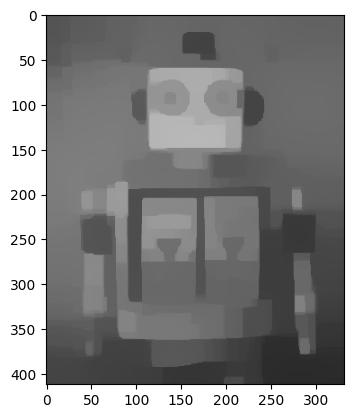

In [23]:
plt.imshow(matrice_to_image(u_optim_sous_grad), cmap='gray')

On constate que le RMSE de la transmission est plus faible que celui de l'image d'origine. Une partie du bruit a donc été éliminé par cette méthode. Cela aura donc tendace à renforcer les traits principaux et à enlever des détails et des nuances de couleurs. Le coût quand à lui a été réduit d'un cinquième.

#### Question 11 -

In [24]:
def optim_sous_gradient_momentum(sous_grad_fun, x0, beta = 0.9,max_iter = 10000, epsilon_variations = 1e-8):
    k = 0
    xk = x0
    lk = 0.05
    sous_grad_f_xk = sous_grad_fun(xk)
    pk = -sous_grad_f_xk
    nb_iterations = 0
    for k in range(max_iter): 
        xk = xk + lk*pk
        nb_iterations += 1
        if (np.linalg.norm((lk*pk).reshape(-1),1) / np.linalg.norm((xk -lk*pk).reshape(-1),1) < epsilon_variations) :  # Condition de sortie
            break
        lk = (nb_iterations)**(-1)
        sous_grad_f_xk = sous_grad_fun(xk)
        pk = beta*pk + (1-beta)*(-sous_grad_f_xk)
    return xk,nb_iterations

u_optim_sous_grad_momentum,nb_iterations = optim_sous_gradient_momentum(g, img_noise)

print("Nombre d'itérations de l'algorithme de sous-gradient avec momentum : ",nb_iterations)

Nombre d'itérations de l'algorithme de sous-gradient avec momentum :  10000


In [25]:
cout_fin_sous_grad_momentum = TV_L2(u_optim_sous_grad_momentum)

print("Initialement, cout = ",cout_ini_bis)
print("Finalement, cout = ", cout_fin_sous_grad_momentum)

Initialement, cout =  58892.31
Finalement, cout =  4311.337


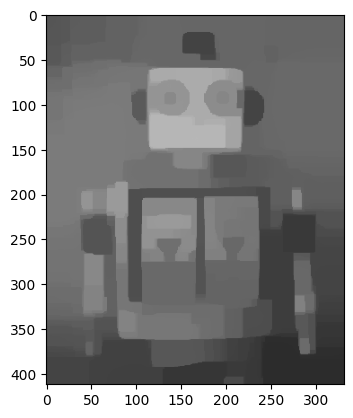

In [26]:
plt.imshow(matrice_to_image(u_optim_sous_grad_momentum), cmap='gray')

#### Question 12 -

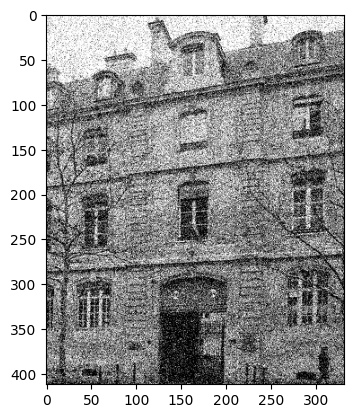

In [27]:
# L'image d'origine est en RGB, on l'importe en noir et blanc avec 1 canal :
img_bis_no_noise = plt.imread('mines_no_noise.jpg')

# L'importation code les pixels sur des entiers de 8bits, on veut des flotants de 32bits :
img_bis_no_noise = img_bis_no_noise.astype(np.float32) / 255.0

# Fabrication de l'image bruitée :
sigma = 0.2             # Ecart-type du bruit gaussien
bruit = np.random.normal(0, sigma, img_bis_no_noise.shape)
img_bis_noise = img_bis_no_noise + bruit
img_bis_noise = np.clip(img_bis_noise, 0, 1)     # On assure des pixel entre 0 et 1

plt.imshow(matrice_to_image(img_bis_noise), cmap='gray')

In [28]:

def g(u):
    res = u -img_bis_noise -divergence(np.sign(grad_img(u)))
    return res

def TV_L2(u):
    difference =  u -img_bis_noise
    terme_1 = 0.5*np.linalg.norm(difference.reshape(-1),2)**2
    terme_2 = np.linalg.norm(grad_img(u).ravel(),1)
    res = terme_1 + terme_2
    return res

Commenter les méthodes....

Nombre d'itérations de l'algorithme de sous-gradient :  10000
RMSE pour l'image bruitée d'origine : 0.3617261737292567
RMSE pour l'image obtenue par minimisation via une méthode de sous-gradient : 0.279251269997503
Initialement, cout =  58826.325722344045
Finalement, cout =  3856.535955069336


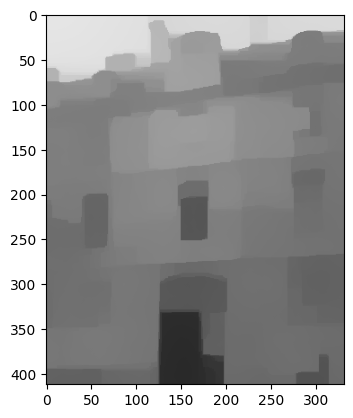

In [29]:
u_optim_sous_grad_bis,nb_iterations_bis = optim_sous_gradient(g, img_bis_noise)

print("Nombre d'itérations de l'algorithme de sous-gradient : ",nb_iterations_bis)

print(f"RMSE pour l'image bruitée d'origine : {RMSE(img_bis_noise)}")
print(f"RMSE pour l'image obtenue par minimisation via une méthode de sous-gradient : {RMSE(u_optim_sous_grad_bis)}")

cout_fin_sous_grad_bis = TV_L2(u_optim_sous_grad_bis)
cout_ini_ter = TV_L2(img_bis_noise)

print("Initialement, cout = ",cout_ini_ter)
print("Finalement, cout = ", cout_fin_sous_grad_bis)

plt.imshow(matrice_to_image(u_optim_sous_grad_bis), cmap='gray')


Nombre d'itérations de l'algorithme de sous-gradient momentum :  10000
RMSE pour l'image bruitée d'origine : 0.3617261737292567
RMSE pour l'image obtenue par minimisation via une méthode de sous-gradient momentum : 0.279251269997503
Initialement, cout =  58826.325722344045
Finalement, cout =  3823.1342507887257


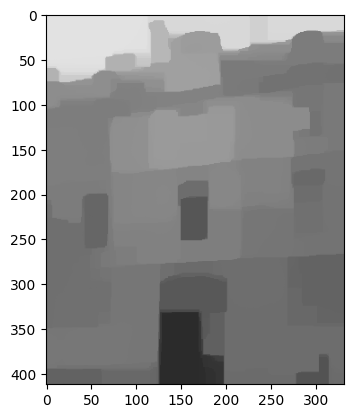

In [30]:
u_optim_sous_grad_momentum_bis,nb_iterations_bis = optim_sous_gradient_momentum(g, img_bis_noise)

print("Nombre d'itérations de l'algorithme de sous-gradient momentum : ",nb_iterations_bis)

print(f"RMSE pour l'image bruitée d'origine : {RMSE(img_bis_noise)}")
print(f"RMSE pour l'image obtenue par minimisation via une méthode de sous-gradient momentum : {RMSE(u_optim_sous_grad_bis)}")

cout_fin_sous_grad_momentum_bis = TV_L2(u_optim_sous_grad_momentum_bis)
cout_ini_ter = TV_L2(img_bis_noise)

print("Initialement, cout = ",cout_ini_ter)
print("Finalement, cout = ", cout_fin_sous_grad_momentum_bis)

plt.imshow(matrice_to_image(u_optim_sous_grad_momentum_bis), cmap='gray')

On constate que les deux méthodes disposent d'un RSME à peu près similaires. Elles perdent à peu près autant d'informations et leurs rendus moins fins sont similaires. Néamoins on peut constater que la seconde méthode dispose d'un coût inférieur à celui de la première. Elle est donc préférable.